In [1]:
import numpy as np
from sklearn.manifold import TSNE
import json
import glob
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
chunk_embeddings = json.load(open('../data/result/chunk_embeddings/1103/all_chunks.json'))
embeddings_dict = {chunk['id']: chunk for chunk in chunk_embeddings}

In [3]:
chunks_groupby_topic = defaultdict(list)
for interview_file in glob.glob('../data/result/chunk_summaries/*.json'):
    interview = json.load(open(interview_file))
    for chunk in interview:
        chunk_id = chunk['id']
        chunk_topic = chunk['topic']
        chunk_embedding = embeddings_dict[chunk_id]['embedding']
        chunks_groupby_topic[chunk_topic].append({
            "id": chunk_id,
            "embedding": chunk_embedding,
        })

In [4]:
def plot(XY):
    plt.figure(figsize=(8, 6))
    plt.scatter(XY[:, 0], XY[:, 1])
    plt.title('Scatterplot')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()
def min_max_normalize(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    
    return normalized_data
def save_json(data, filepath=r'new_data.json'):
    with open(filepath, 'w', encoding='utf-8') as fp:
        json.dump(data, fp, indent=4)

環境生態
185
[[ 0.01923098 -0.01349135  0.02021122 ... -0.00488191 -0.02348733
  -0.01220799]
 [ 0.02466554 -0.0054077   0.01450521 ... -0.00233454 -0.02740615
  -0.02069499]
 [ 0.0194949  -0.00557418  0.01567185 ...  0.00037007 -0.02867281
  -0.0354286 ]
 ...
 [ 0.02022603  0.00028137  0.01538684 ... -0.00583493 -0.01093036
  -0.02199046]
 [ 0.04584736 -0.01082968  0.03626922 ... -0.0030235  -0.01489081
  -0.0120493 ]
 [ 0.03500485 -0.00309222  0.02114558 ... -0.01447071 -0.0119549
  -0.00824805]]


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


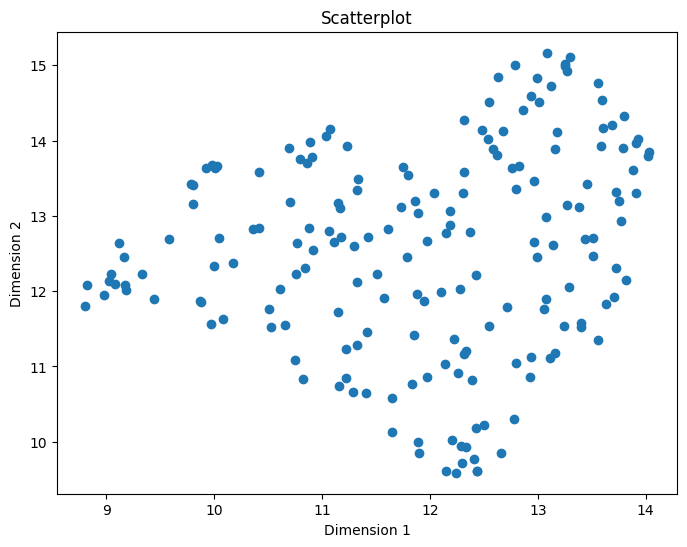

In [6]:
from sklearn.manifold import MDS, SpectralEmbedding, TSNE, LocallyLinearEmbedding
import umap
reducer = umap.UMAP()

# save_json(chunks, r'../data/result/chunk_coordinates.json')
chunk_coordinates = {}
for topic, chunks in chunks_groupby_topic.items():
    if len(chunks) < 150: continue
    print(topic)
    print(len(chunks))
    embeddings = np.array([chunk['embedding'] for chunk in chunks])
    print(embeddings)
    chunk_ids = [chunk['id'] for chunk in chunks]
    # XY = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15, metric='cosine').fit_transform(embeddings)
    # XY = MDS(n_components=2).fit_transform(embeddings)
    XY = reducer.fit_transform(embeddings)
    plot(XY)
    XY = min_max_normalize(XY)
    break
    for chunk_id, coordinate in zip(chunk_ids, XY):
        chunk_coordinates[chunk_id] = coordinate.tolist()
# save_json(chunks, r'../data/result/chunk_coordinates.json')

In [27]:
save_json(chunk_coordinates, r'../data/result/chunk_coordinates.json')